In [1]:
#!pip install plotly
#!pip install altair
#!pip install pandas
#!pip install matplotlib

### Inicializacion

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
def levantarStream(df, orden_meses, comuna):
    # Crear el gráfico de tipo stream con Plotly Express
    fig = px.area(df, x='mes', y='tasa', color='delito',
                  title=f'Streamgraph de Tasas de Delitos en {comuna}',
                  labels={'tasa': 'Tasa de Delito cada/100.000 hab.', 'delito': 'Tipo de Delito'},
                  category_orders={"mes": orden_meses})
    
    
    # Agregar líneas verticales y una etiqueta para Verano
    fig.add_shape(dict(type='line', x0='Marzo', x1='Marzo', y0=0, y1=1, xref='x', yref='paper',
                       line=dict(color='black', width=2, dash='dash')))
    fig.add_annotation(text='Verano', x='Febrero', y=-2.5, showarrow=False, font=dict(color='black'))
    
    
    #Linea y etiqueta otoño
    fig.add_shape(dict(type='line', x0='Junio', x1='Junio', y0=0, y1=1, xref='x', yref='paper',
                       line=dict(color='black', width=2, dash='dash')))
    fig.add_annotation(text='Otoño', x=3.5, y=-2.5, showarrow=False, font=dict(color='black'))
    
    #Linea y etiqueta Invierno
    fig.add_shape(dict(type='line', x0='Septiembre', x1='Septiembre', y0=0, y1=1, xref='x', yref='paper',
                       line=dict(color='black', width=2, dash='dash')))
    fig.add_annotation(text='Invierno', x=6.5, y=-2.5, showarrow=False, font=dict(color='black'))
    
    #Linea y etiqueta Primavera
    fig.add_shape(dict(type='line', x0='Diciembre', x1='Diciembre', y0=0, y1=1, xref='x', yref='paper',
                       line=dict(color='black', width=2, dash='dash')))
    fig.add_annotation(text='Primavera', x=9.5, y=-2.5, showarrow=False, font=dict(color='black'))
    
    
    # Mostrar el gráfico
    fig.show()

In [33]:
def levantarStream2(df, orden_meses, comuna, colores_delitos):
    # Crear el gráfico de tipo stream con Plotly Express
    fig = px.area(df, x='mes', y='tasa', color='delito',
                  title=f'Streamgraph de Tasas de Delitos en {comuna}',
                  labels={'tasa': 'Tasa de Delito cada/100.000 hab.', 'delito': 'Tipo de Delito'},
                  category_orders={"mes": orden_meses},
                  color_discrete_map=colores_delitos)  # Asignar colores personalizados

    # Agregar líneas verticales y etiquetas para las estaciones del año
    for mes, estacion in [("Marzo", "Verano"), ("Junio", "Otoño"), ("Septiembre", "Invierno"), ("Diciembre", "Primavera")]:
        fig.add_shape(dict(type='line', x0=mes, x1=mes, y0=0, y1=1, xref='x', yref='paper',
                           line=dict(color='black', width=2, dash='dash')))
        fig.add_annotation(text=estacion, x=orden_meses.index(mes) - 0.5, y=-2.5, showarrow=False, font=dict(color='black'))

    # Mostrar el gráfico
    fig.show()

In [30]:
def deployComparacion(delito, df1, df2, maximo):
    #print(maximos)
    
    # Filtrar por delito especifico
    df_del1 = df1[df1["delito"]== delito]
    df_del2 = df2[df2["delito"]== delito]

    nombre1 = df_del1["nombre"].unique()
    nombre2 = df_del2["nombre"].unique()

    meses = df_del1["mes"].unique()
    
    # Extraer las tres primeras letras de cada mes
    meses_abreviados = [mes[:3] for mes in meses]

    # Ajustar las posiciones de las barras
    ancho_barra = 0.35

    pos_del1 = np.arange(len(meses))
    pos_del2 = pos_del1 + ancho_barra
    
    # Configurar el gráfico de barras agrupadas por mes
    plt.bar(pos_del1, df_del1["tasa"], width=ancho_barra, label=f"{nombre1[0]}", color='gray', edgecolor='black')
    plt.bar(pos_del2, df_del2["tasa"], width=ancho_barra, label=f"{nombre2[0]}", alpha=0.7, color='lightgray', edgecolor='black')

    # Añadir etiquetas y título
    plt.xlabel("Mes")
    plt.ylabel("Tasa de Delito")
    plt.title(f"Comparación Mensual de la Tasa de {delito} entre {nombre1[0]} y {nombre2[0]}")
    plt.xticks(pos_del1 + ancho_barra / 2, meses_abreviados)  # Etiquetas en el centro de las agrupaciones

    # Añadir líneas verticales para identificar las estaciones con etiquetas
    plt.axvline(x=2.7, color='black', linestyle='--', alpha=0.9)  # Entre Febrero y Marzo
    plt.axvline(x=5.7, color='black', linestyle='--', alpha=0.9)  # Entre Mayo y Junio
    plt.axvline(x=8.7, color='black', linestyle='--', alpha=0.9)  # Entre Agosto y Septiembre
    plt.axvline(x=11.7, color='black', linestyle='--', alpha=0.9)  # Entre Noviembre y Diciembre
    
    # Etiquetas de estaciones
    plt.text(2, maximo + 2 , 'Verano', color='black', ha='right')
    plt.text(4.3, maximo + 2 , 'Otoño', color='black', ha='center')
    plt.text(7.3, maximo + 2 , 'Invierno', color='black', ha='center')
    plt.text(10.3, maximo + 2 , 'Primavera', color='black', ha='center')
    
    # Establecer el límite y de los ejes y para controlar el valor máximo
    plt.ylim(0, maximo+10)
    
    # Mostrar el gráfico con leyenda fuera del plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Ajustar el diseño para evitar que la leyenda se recorte
    plt.tight_layout()
    plt.show()

In [34]:
# Cargar datos desde el archivo Excel
archivo_excel_coyhaique = "./CoyhaiqueV2.xlsx"  
archivo_excel_valdivia = "./ValdiviaV2.xlsx"    

# Leer datos de los archivos Excel
df1 = pd.read_excel(archivo_excel_coyhaique)
df2 = pd.read_excel(archivo_excel_valdivia)

delitos_todos = df1["delito"].unique()

colores_delitos = {
    'Robo con Violencia o Intimidación': '#1f77b4',
    'Robo por Sorpresa': '#ff7f0e',
    'Robo Lugar Habitado': '#2ca02c',
    'Robo Lugar No Habitado': '#d62728',
    'Robo de Vehículo': '#9467bd',
    'Robo Accesorio Vehículo': '#8c564b',
    'Otros Robos con Fuerza': '#e377c2',
    'Hurtos': '#7f7f7f',
    'Lesiones': '#bcbd22',
    'Homicidios': '#17becf',
    'Violación': '#ff9896'
}


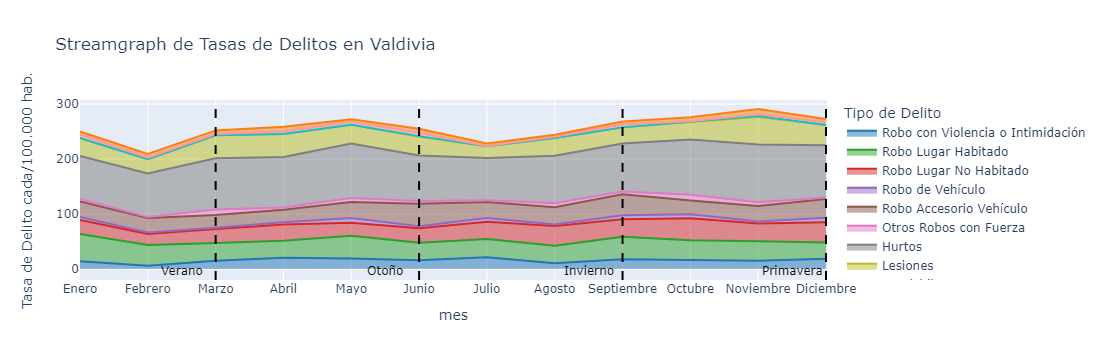

In [35]:
levantarStream2(df_stream, orden_meses, "Valdivia", colores_delitos)

In [21]:
import plotly.express as px
import plotly.graph_objects as go
# Definir el orden de los meses
orden_meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]

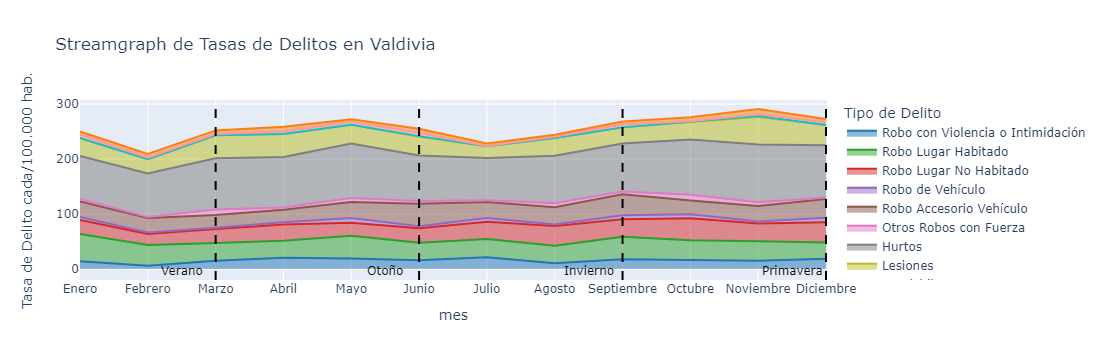

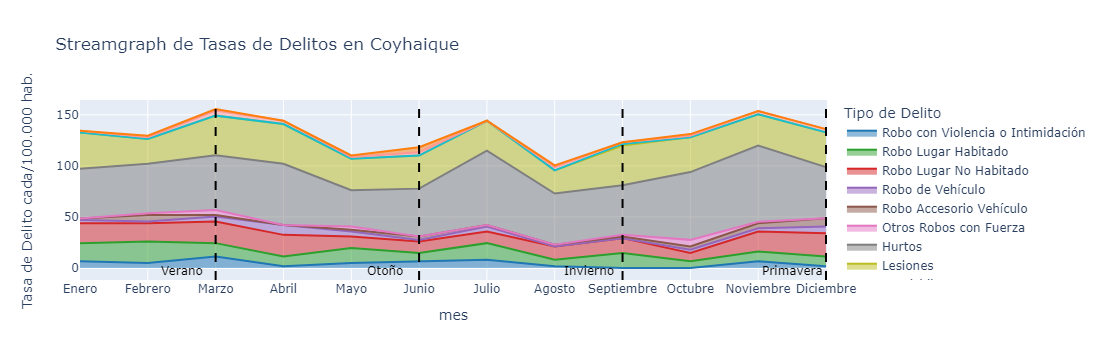

In [37]:
# Cargar datos desde el archivo Excel
df_stream = df2.sort_values("mes")
df_stream2 = df1.sort_values("mes")

levantarStream2(df_stream, orden_meses, "Valdivia", colores_delitos)
levantarStream2(df_stream2, orden_meses, "Coyhaique", colores_delitos)

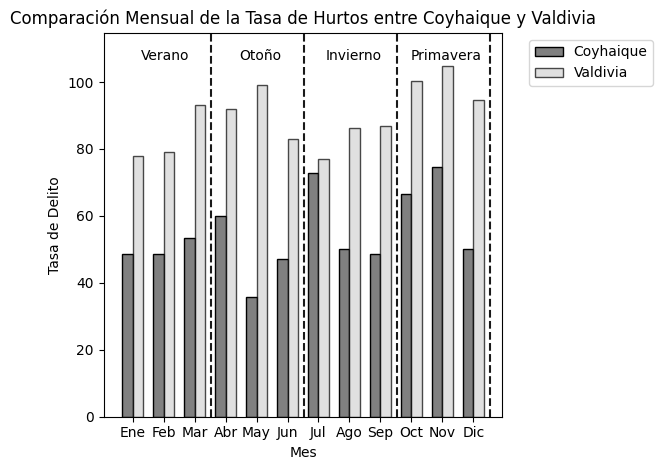

In [18]:
# Seleccionar el delito que deseas comparar
#delito_seleccionado = "Robo con Violencia o Intimidación"
delito_seleccionado = "Hurtos"
#delito_seleccionado = "Robo Lugar Habitado"

deployComparacion("Hurtos",df1, df2, max(max(df1["tasa"]), max(df2["tasa"])))

## Comparaciones de todos los delitos

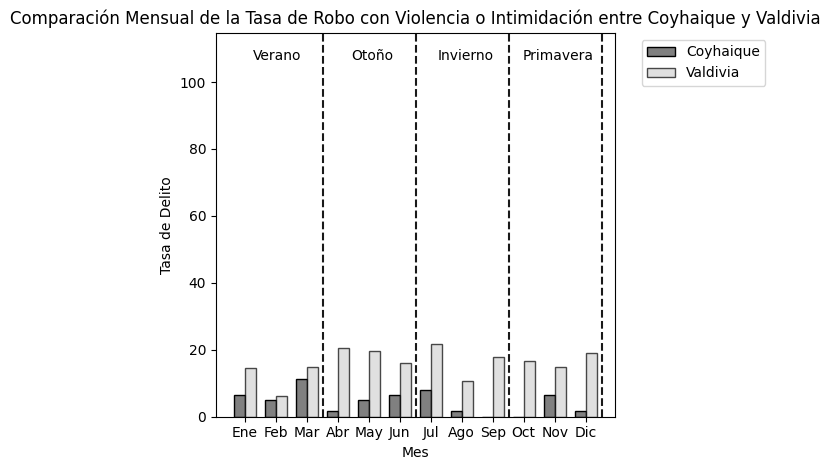

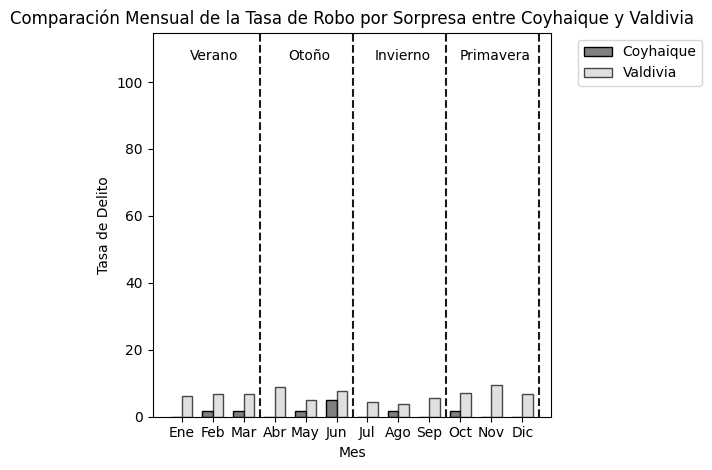

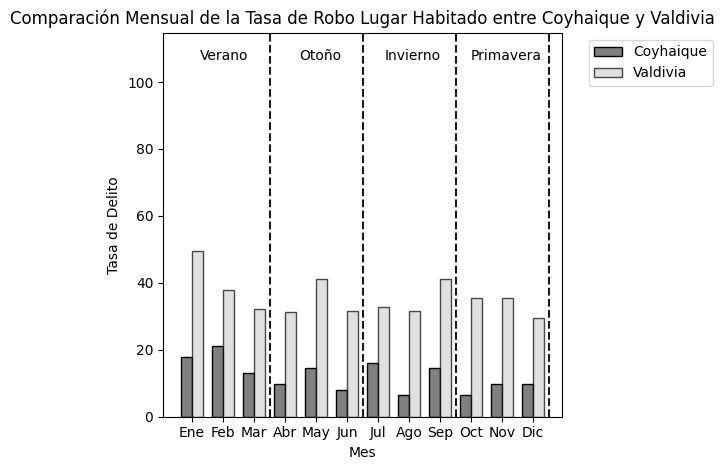

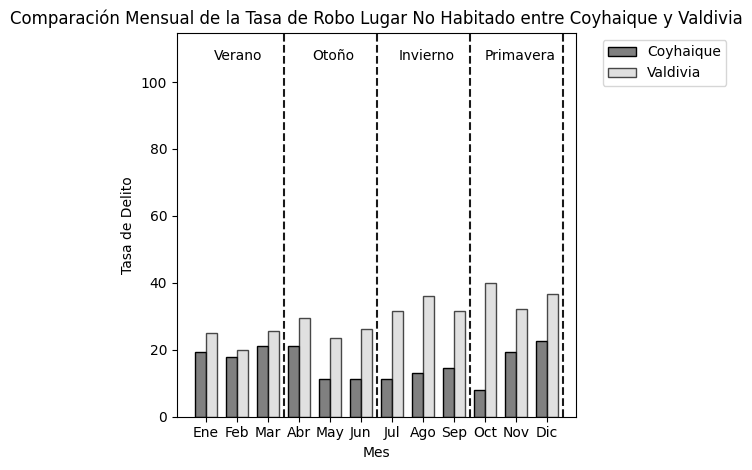

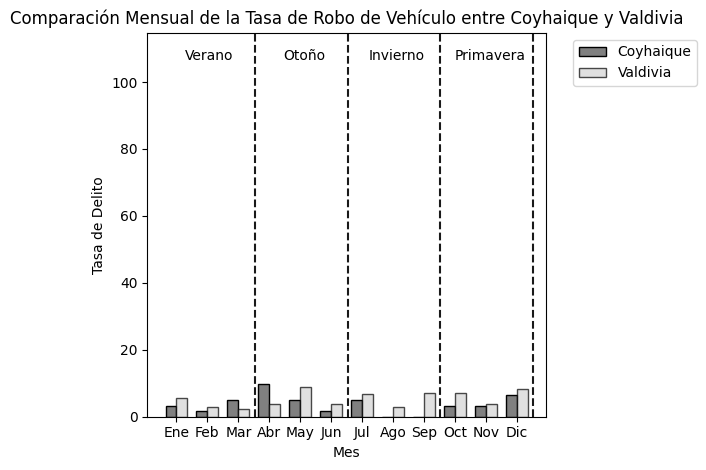

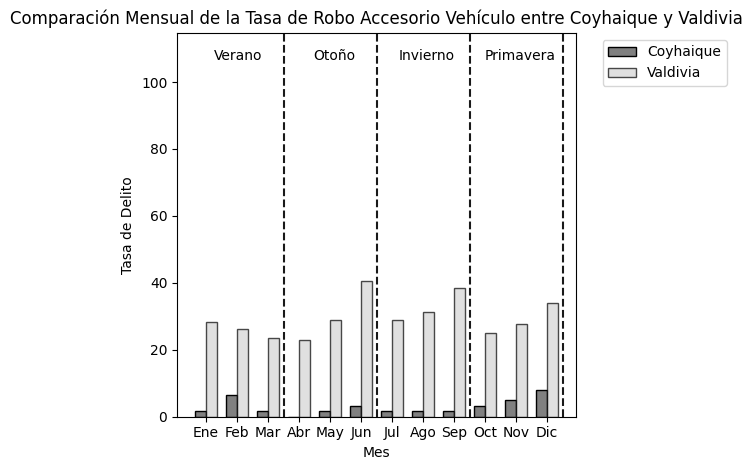

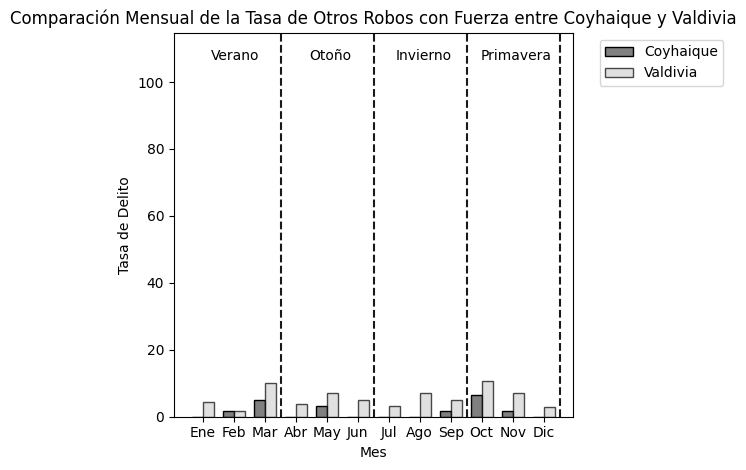

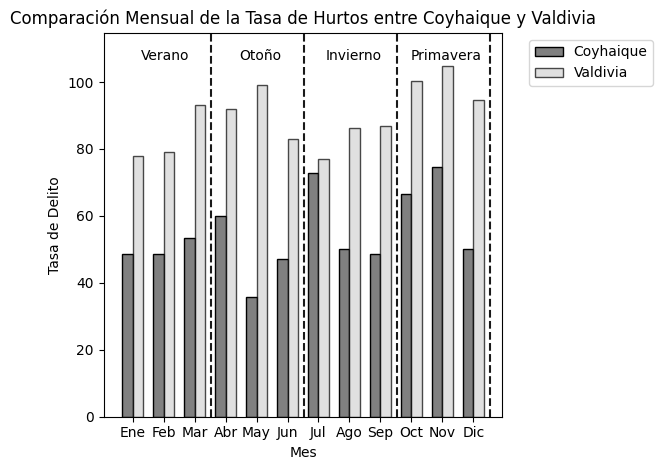

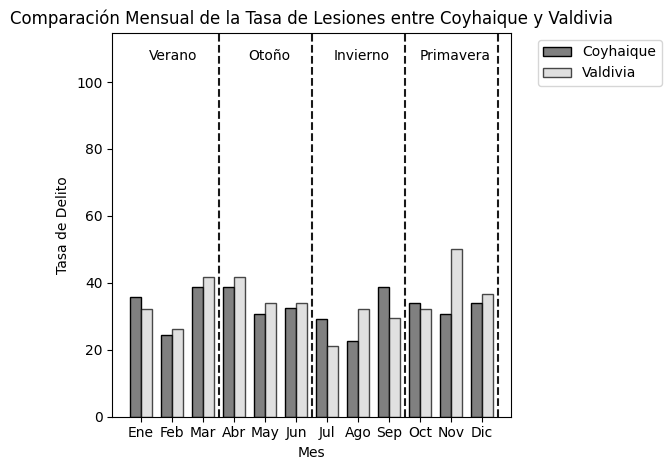

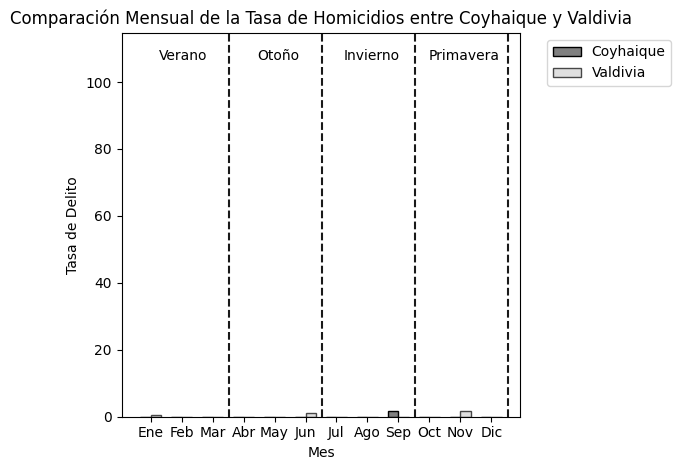

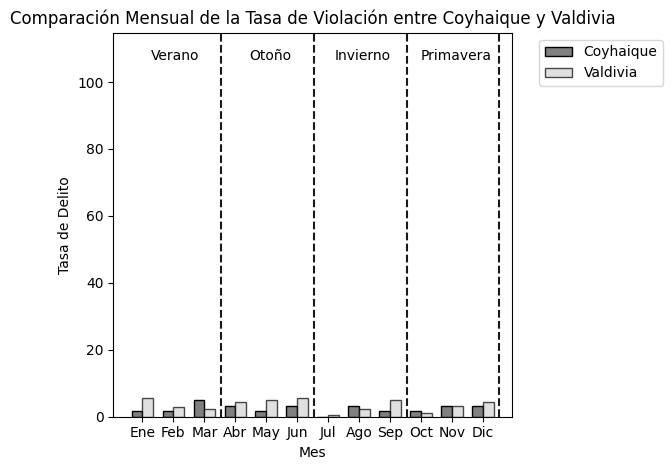

In [27]:
for delito in delitos_todos:
    deployComparacion(delito, df1, df2, max(max(df1["tasa"]), max(df2["tasa"])))